In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
#skips comments and read the rest of the lines
with open("ASTR19_S22_group_project_data.txt", "r") as f:
    f.readline()
    f.readline()
    f.readline()
    
    lines = f.readlines()

# empty arrays
d = []
t = []
h = []

# create arrays for day, time, and height
for line in lines:
    day, time, height = line.split()
    d.append(int(day))
    t.append(time)
    h.append(float(height))

# convert to hours 
t = np.array([int(time.split(':')[0]) + int(time.split(':')[1]) / 60 for time in t])

i = 0;
for days in d:
    day = (days - 1) * 24;
    t[i] += day
    i += 1

In [3]:
x = np.arange(8, 984, 6.2)

In [124]:
actual_tide_values = np.array(h)
error = 0.25
/
initial_guess = [(np.max(actual_tide_values) - np.min(actual_tide_values)), 1/24, 0, np.mean(actual_tide_values), (np.max(actual_tide_values)), 1/(24*14), 0, np.mean(actual_tide_values)/2]

def tide_function(time, amplitude1, frequency1, phase_shift1, offset1, amplitude2, frequency2, phase_shift2, offset2):
    return (amplitude1 * np.sin(2*np.pi*frequency1 * time + phase_shift1)+ offset1) * (amplitude2 * np.sin((2*np.pi*frequency2 * time + phase_shift2))+ offset2) 

params, covariance = curve_fit(tide_function, t, actual_tide_values,  p0=initial_guess, sigma=np.full_like(actual_tide_values, error))

fitted_tide_values = tide_function(t, *params)


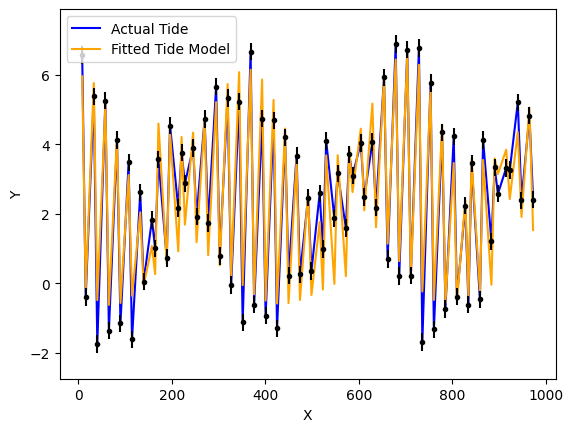

In [125]:
plt.figure()
plt.plot(t, actual_tide_values, label='Actual Tide', color='blue')
plt.plot(t, fitted_tide_values, label='Fitted Tide Model', color='orange')
plt.errorbar(t, actual_tide_values, yerr=.25, fmt='.k');
plt.ylim(min(actual_tide_values) - 1, max(actual_tide_values) + 1)
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
# plt.savefig("Waves.png")
plt.show()

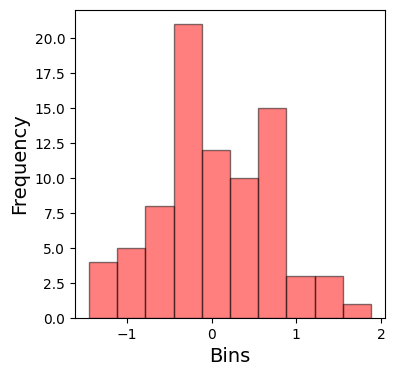

In [119]:
def histogram_plot(
    flag_save=False, #save the figure?
    xlabel='Bins', #x-axis label
    ylabel='Frequency', #y-axis label
    lcolor='red', #line color
    fs=14, #font size
    fname='hist.pdf'):
    hist, bins = plt.subplots(1,1,figsize=(4,4))
    
    plt.hist(actual_tide_values - fitted_tide_values,facecolor=lcolor,bins=10,edgecolor='black',alpha=0.5)
    
    bins.set_xlabel(xlabel,fontsize=fs)
    bins.set_ylabel(ylabel,fontsize=fs)
    
    if(flag_save):
        plt.savefig(fname,bbox_inches='tight',dpi=400)

histogram_plot()